In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={"parcelid": int})

In [4]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={"parcelid": int})

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [6]:
train_df = train_df1.copy()

17년 데이터는 생략한 상태

## Tax feature data analysis

- 'taxvaluedollarcnt'
- 'structuretaxvaluedollarcnt'
- 'landtaxvaluedollarcnt'
- 'taxamount'
- 'assessmentyear'
- 'taxdelinquencyflag'
- 'taxdelinquencyyear'

In [7]:
tax_feature = [
    '소포의 총 세금 평가 가치',
    '소포에 건설 된 구조물의 평가 된 가치',
    '소포의 토지 면적에 대한 평가 된 가치',
    '해당 평가 연도에 대해 평가 된 총 재산세',
    '재산세 산정 년도',
    '이 소포의 재산세는 2015 년까지 만기가됩니다.',
    '미납 된 재산세 납부시기'
]

In [8]:
tax_feature_col = [
    'taxvaluedollarcnt',
    'structuretaxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount',
    'assessmentyear',
    'taxdelinquencyflag',
    'taxdelinquencyyear'
]

In [11]:
tax_df = pd.DataFrame(columns=['name','feature'])
tax_df.name = tax_feature_col
tax_df.feature = tax_feature
tax_df

,name,feature
0,taxvaluedollarcnt,소포의 총 세금 평가 가치
1,structuretaxvaluedollarcnt,소포에 건설 된 구조물의 평가 된 가치
2,landtaxvaluedollarcnt,소포의 토지 면적에 대한 평가 된 가치
3,taxamount,해당 평가 연도에 대해 평가 된 총 재산세
4,assessmentyear,재산세 산정 년도
5,taxdelinquencyflag,이 소포의 재산세는 2015 년까지 만기가됩니다.
6,taxdelinquencyyear,미납 된 재산세 납부시기


In [29]:
print(train_df[tax_feature_col].dtypes,end='\n\n'),
print('Number of tax_feature_col:  {}'.format(len(tax_feature_col)))

taxvaluedollarcnt             float64
structuretaxvaluedollarcnt    float64
landtaxvaluedollarcnt         float64
taxamount                     float64
assessmentyear                float64
taxdelinquencyflag             object
taxdelinquencyyear            float64
dtype: object

Number of tax_feature_col:  7


tax_feature_col 의 자료형에서 taxdelinquencyflag의 자료형이 object이므로 따로 빼두어서 저장해두겠습니다.

In [31]:
tax_obj_col = tax_feature_col.pop(5)
tax_obj_col,tax_feature_col

('taxdelinquencyflag',
 ['taxvaluedollarcnt',
  'structuretaxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount',
  'assessmentyear',
  'taxdelinquencyyear'])

### individual columns' feature analysis

### Regression plot about numerical data

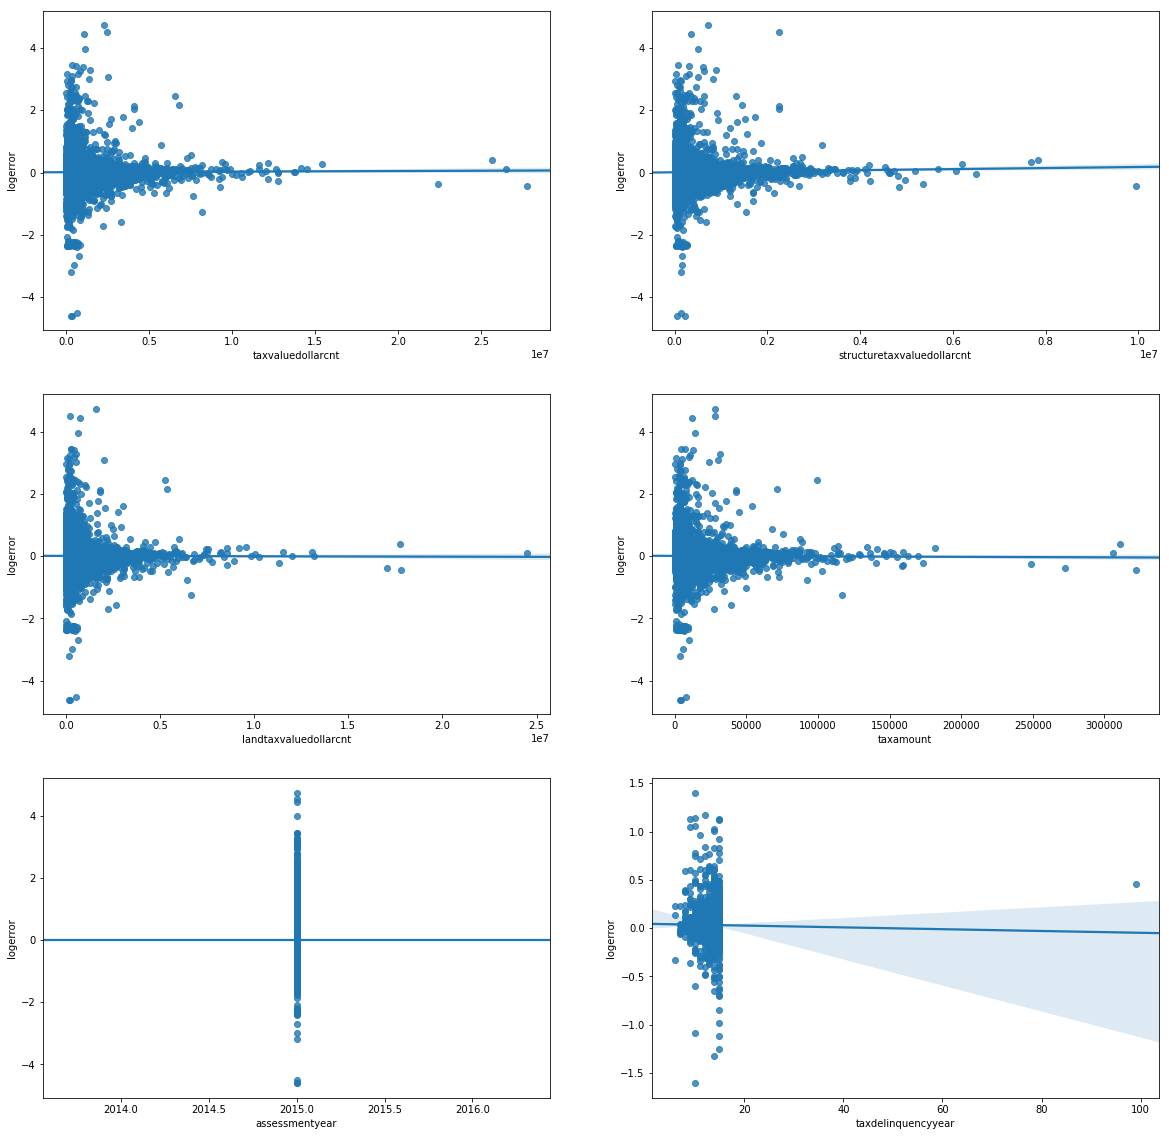

In [32]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(tax_feature_col):
    plt.subplot(3,2,idx+1)
    sns.regplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

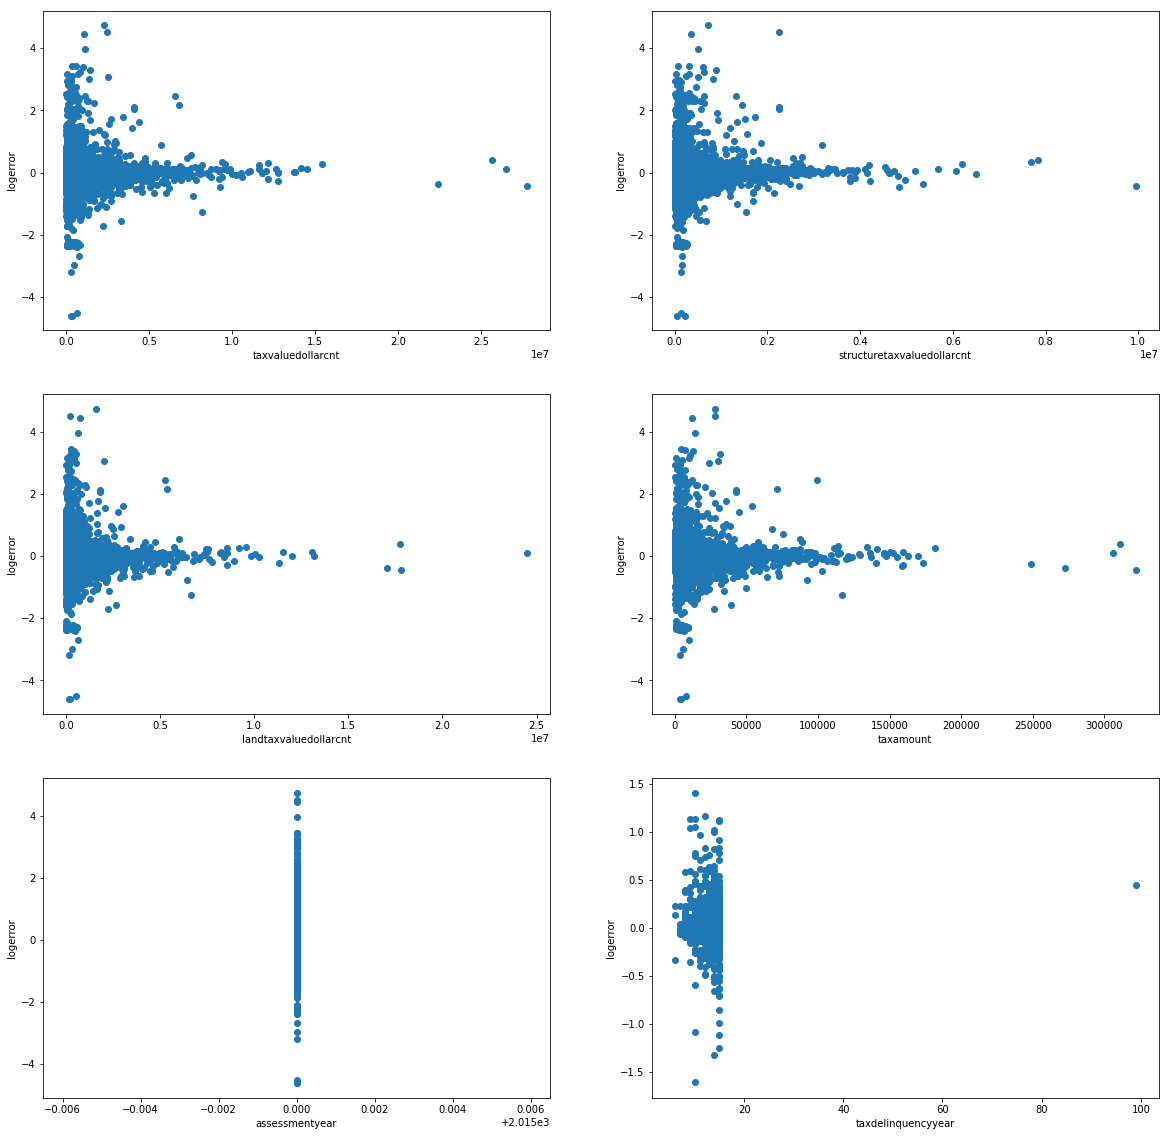

In [33]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(tax_feature_col):
    plt.subplot(3,2,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(tax_feature_col):
    plt.subplot(3,2,idx+1)
    sns.stripplot(train_df[col],train_df.logerror,data=train_df)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show(col)

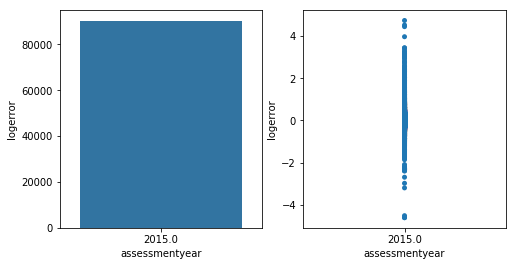

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(train_df.assessmentyear)
plt.xlabel('assessmentyear')
plt.ylabel('logerror')
plt.subplot(1,2,2)
sns.stripplot(train_df.assessmentyear,train_df.logerror,data=train_df)
plt.xlabel('assessmentyear')
plt.ylabel('logerror')
plt.show()

## Comments